In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x = tf.linspace(-3.0, 3.0, 100)

# tensorflow doesn't execute stuff then and there
print(x)

Tensor("LinSpace:0", shape=(100,), dtype=float32)


In [3]:
g = tf.get_default_graph()

In [4]:
[op.name for op in g.get_operations()]

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace']

In [5]:
# We're first going to create a session:
sess = tf.Session()

# Now we tell our session to compute anything we've created in the tensorflow graph.
computed_x = sess.run(x)
print(computed_x)

# Alternatively, we could tell the previous Tensor to evaluate itself using this session:
computed_x = x.eval(session=sess)
print(computed_x)

# We can close the session after we're done like so:
sess.close()

[-3.         -2.939394   -2.87878799 -2.81818175 -2.75757575 -2.69696975
 -2.63636351 -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.33333325
 -2.27272725 -2.21212125 -2.15151501 -2.090909   -2.030303   -1.969697
 -1.90909088 -1.84848475 -1.78787875 -1.72727275 -1.66666663 -1.6060605
 -1.5454545  -1.4848485  -1.42424238 -1.36363626 -1.30303025 -1.24242425
 -1.18181813 -1.12121201 -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.69696951 -0.63636351 -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.15151501
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.27272749  0.33333349  0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.75757599  0.81818199  0.87878799  0.939394    1.
  1.060606    1.12121201  1.18181849  1.24242449  1.30303049  1.36363649
  1.4242425   1.4848485   1.5454545   1.60606098  1.66666698  1.72727299
  1.78787899  1.84848499  1.909091    1.969697    2

In [6]:
sess = tf.InteractiveSession()
x.eval()

array([-3.        , -2.939394  , -2.87878799, -2.81818175, -2.75757575,
       -2.69696975, -2.63636351, -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.33333325, -2.27272725, -2.21212125, -2.15151501,
       -2.090909  , -2.030303  , -1.969697  , -1.90909088, -1.84848475,
       -1.78787875, -1.72727275, -1.66666663, -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.42424238, -1.36363626, -1.30303025, -1.24242425,
       -1.18181813, -1.12121201, -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.69696951, -0.63636351,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.15151501, -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.27272749,
        0.33333349,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.75757599,  0.81818199,  0.87878799,
        0.939394  ,  1.        ,  1.060606  ,  1.12121201,  1.18

In [7]:
# We can find out the shape of a tensor like so:
print(x.get_shape())

# %% Or in a more friendly format
print(x.get_shape().as_list())

(100,)
[100]


In [8]:
# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Don't worry about trying to learn or remember this formula.  I always have to refer to textbooks or check online for the exact formula.
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

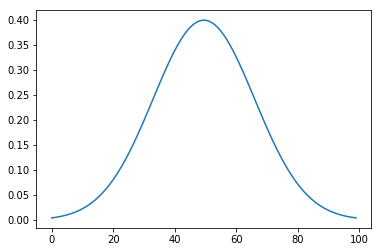

In [12]:
res = z.eval()
%matplotlib inline
plt.plot(res)

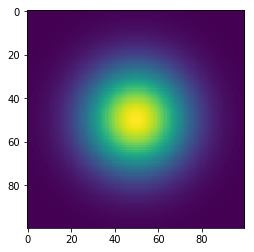

In [13]:
# Let's store the number of values in our Gaussian curve.
ksize = z.get_shape().as_list()[0]

# Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

# Execute the graph
plt.imshow(z_2d.eval())